<a href="https://colab.research.google.com/github/Sagar0120/Hyperparameter-Optimization-For-Xgboost./blob/main/Hyperparameter_Optimization_For_Xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd

In [91]:
df = pd.read_csv('/content/drive/MyDrive/ML/Churn_Modelling.csv')

In [92]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


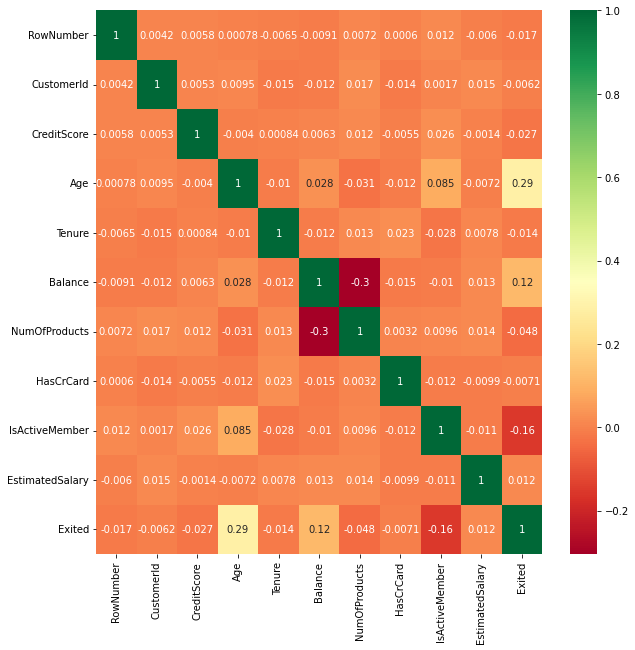

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize= (10,10))
g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = 'RdYlGn')

In [94]:
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [95]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [96]:
y.head(13)

0     1
1     0
2     1
3     0
4     0
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    0
Name: Exited, dtype: int64

In [97]:
gender = pd.get_dummies(X['Gender'], drop_first = True)

In [98]:
gender.head(10)

,Male
0,0
1,0
2,0
3,0
4,0
5,1
6,1
7,0
8,1
9,1


In [99]:
geography=pd.get_dummies(X['Geography'],drop_first=True)

In [100]:
X = X.drop(['Geography', 'Gender'], axis = 1)

In [101]:
X.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
5,645,44,8,113755.78,2,1,0,149756.71
6,822,50,7,0.00,2,1,1,10062.80
7,376,29,4,115046.74,4,1,0,119346.88
8,501,44,4,142051.07,2,0,1,74940.50
9,684,27,2,134603.88,1,1,1,71725.73


In [102]:
X = pd.concat([X, geography, gender], axis = 1)

In [103]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [104]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]   
}

In [105]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [106]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


In [107]:
classifier=xgboost.XGBClassifier()

In [108]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [109]:
from datetime import datetime
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 24.39 seconds.


In [120]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [121]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [122]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [123]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)

[12:55:09] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 649, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1525, in predict
    class_probs = super().predict(
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1114, in predict
    predts = self.get_booster().inplace_predict(
  File "/usr/local/lib/python3.9/dist-pack

[12:55:09] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 649, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1525, in predict
    class_probs = super().predict(
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1114, in predict
    predts = self.get_booster().inplace_predict(
  File "/usr/local/lib/python3.9/dist-pack

[12:55:10] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 649, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1525, in predict
    class_probs = super().predict(
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1114, in predict
    predts = self.get_booster().inplace_predict(
  File "/usr/local/lib/python3.9/dist-pack

[12:55:11] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 649, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1525, in predict
    class_probs = super().predict(
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1114, in predict
    predts = self.get_booster().inplace_predict(
  File "/usr/local/lib/python3.9/dist-pack

[12:55:13] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 649, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1525, in predict
    class_probs = super().predict(
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1114, in predict
    predts = self.get_booster().inplace_predict(
  File "/usr/local/lib/python3.9/dist-pack

[12:55:14] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[12:55:14] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 649, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1525, in predict
    class_probs = super().predict(
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1114, in predict
    predts = self.get_booster().inplace_predict(
  File "/usr/local/lib/python3.9/dist-pack

[12:55:15] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 649, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1525, in predict
    class_probs = super().predict(
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1114, in predict
    predts = self.get_booster().inplace_predict(
  File "/usr/local/lib/python3.9/dist-pack

[12:55:16] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[12:55:16] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 649, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1525, in predict
    class_probs = super().predict(
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1114, in predict
    predts = self.get_booster().inplace_predict(
  File "/usr/local/lib/python3.9/dist-pack

In [124]:
score

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [125]:
score.mean()

nan